# Trying out maps suggested by the team

In [1]:
import osmnx as ox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

In [2]:
places = ['Barcelona, Spain',
          'Seville, Spain',
          'Salamanca, Spain',
          'Tossa de Mar, Spain',
          'Lloret de Mar, Spain',
          'New York, NY, USA']
mapps = []
for place in places:
    mapps.append(ox.graph_from_place(place, network_type='drive'))

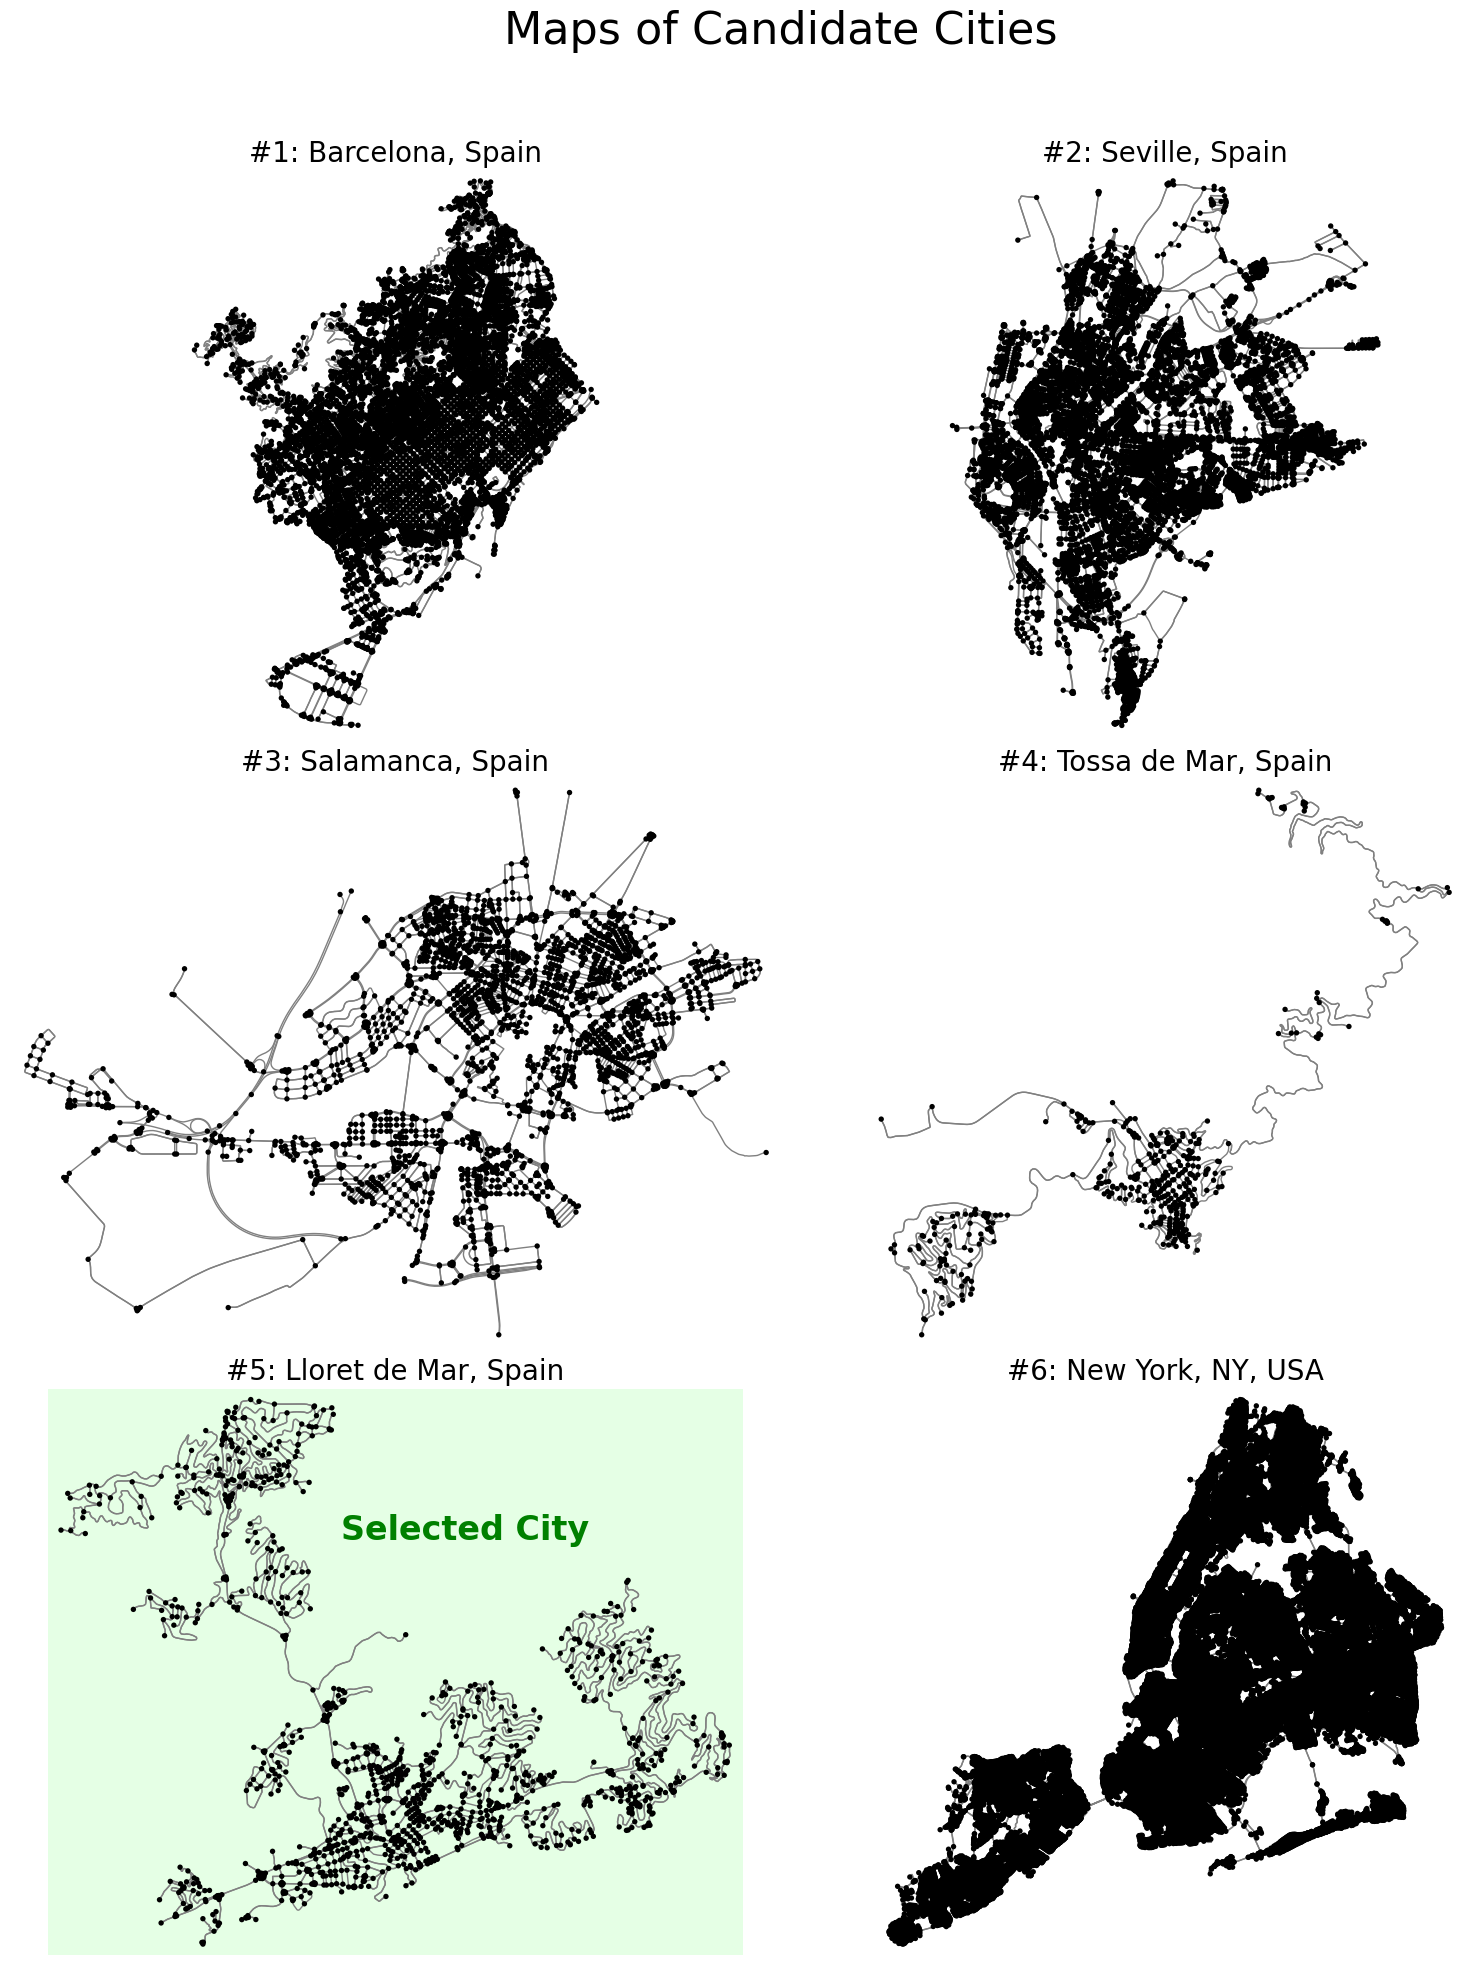

In [3]:
fig, axs = plt.subplots(len(places) // 2, 2, figsize=(16, 20))
for i, (mapp, ax, place) in enumerate(zip(mapps, axs.flatten(), places)):
    ox.plot_graph(mapp, ax=ax, show=False, close=False, edge_color='grey', node_color='black')
    ax.set_title(f"#{i+1}: {place}", fontsize=20)

ax = axs.flatten()[places.index('Lloret de Mar, Spain')]
ax.set_facecolor((0, 1, 0, 0.1))
ax.text(0.6, 0.75, 'Selected City', transform=ax.transAxes, ha='center', va='center', fontweight='bold', fontsize=24, color='green')

fig.suptitle('Maps of Candidate Cities', fontsize=32)
plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('../reports/figures/maps_of_candidate_cities.png', dpi=300)
plt.show()

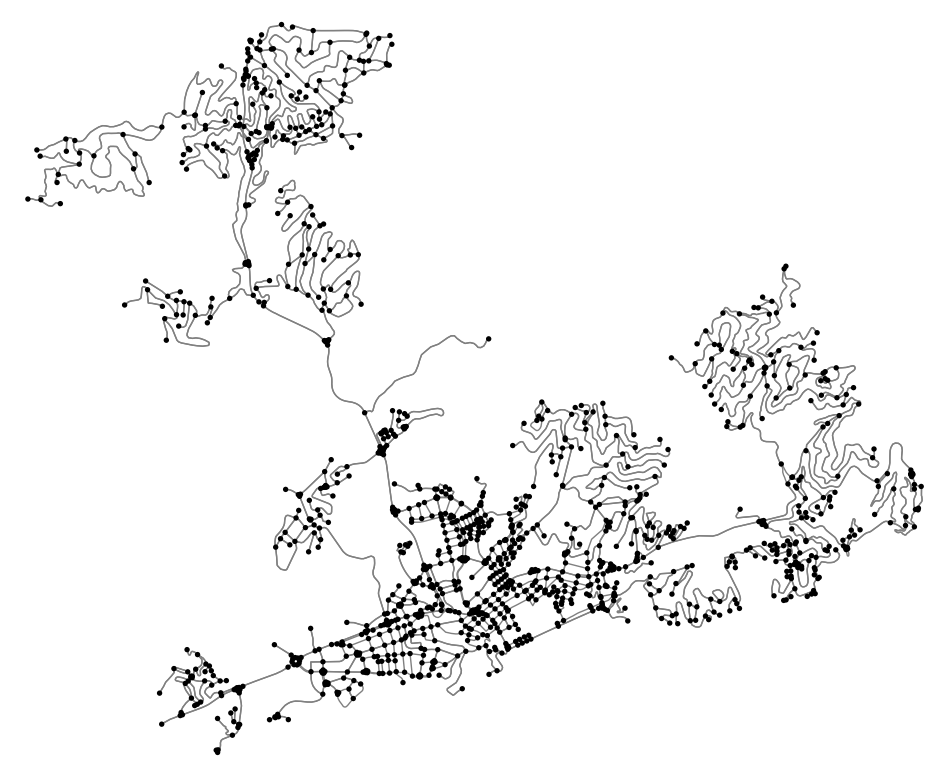

In [4]:
fig, ax = plt.subplots(figsize=(12, 10))
ox.plot_graph(mapps[places.index('Lloret de Mar, Spain')], ax=ax, show=False, close=False, edge_color='grey', node_color='black')
plt.savefig('../reports/figures/map_of_selected_city.png', dpi=300)
plt.show()


In [5]:
mapp_stats = []
for mapp, place in zip(mapps, places):  
    map_proj = ox.project_graph(mapp)
    nodes_proj = ox.graph_to_gdfs(map_proj, edges=False)
    graph_area_m = nodes_proj.unary_union.convex_hull.area
    stats = ox.basic_stats(map_proj, area=graph_area_m, clean_int_tol=15)
    mapp_stats.append(stats)
df = pd.DataFrame(mapp_stats, index=places)


In [6]:
df

,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportions,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,clean_intersection_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,clean_intersection_density_km
"Barcelona, Spain",8888,16503,3.713546,1.679591e+06,101.774915,3.157628,"{0: 0, 1: 641, 2: 136, 3: 5406, 4: 2604, 5: 88...","{0: 0.0, 1: 0.07211971197119713, 2: 0.01530153...",8247,1.392325e+06,13954,99.779615,1.048985,0.000788,5890,75.340400,69.906872,14237.296322,11802.239439,49.927426
"Seville, Spain",10259,20302,3.957891,1.726569e+06,85.044269,3.023199,"{0: 0, 1: 817, 2: 121, 3: 7384, 4: 1888, 5: 42...","{0: 0.0, 1: 0.07963739155863145, 2: 0.01179452...",9442,1.298385e+06,15488,83.831684,1.039855,0.002324,6015,80.543412,74.129145,13555.291740,10193.621923,47.223767
"Salamanca, Spain",3033,6061,3.996703,4.692327e+05,77.418368,3.033960,"{0: 0, 1: 194, 2: 15, 3: 2339, 4: 468, 5: 14, ...","{0: 0.0, 1: 0.06396307286515002, 2: 0.00494559...",2839,3.363925e+05,4575,73.528419,1.037966,0.000874,1485,75.758811,70.913044,11720.578109,8402.471838,37.092593
"Tossa de Mar, Spain",448,958,4.276786,1.306166e+05,136.343049,2.758929,"{0: 0, 1: 76, 2: 4, 3: 321, 4: 46, 5: 1}","{0: 0.0, 1: 0.16964285714285715, 2: 0.00892857...",372,7.266162e+04,616,117.957180,1.343229,0.003247,217,23.780619,19.746407,6933.358512,3857.005344,11.518737
"Lloret de Mar, Spain",1284,2828,4.404984,3.900583e+05,137.927274,2.752336,"{0: 0, 1: 223, 2: 12, 3: 916, 4: 128, 5: 3, 6: 2}","{0: 0.0, 1: 0.17367601246105918, 2: 0.00934579...",1061,2.128866e+05,1759,121.027054,1.232721,0.001137,702,35.406348,29.257115,10755.873167,5870.355696,19.357676
"New York, NY, USA",55290,139457,5.044565,1.615572e+07,115.847325,3.321469,"{0: 0, 1: 3639, 2: 290, 3: 26658, 4: 24119, 5:...","{0: 0.0, 1: 0.06581660336408031, 2: 0.00524507...",51651,1.118591e+07,91838,121.800420,1.020689,0.000828,43218,46.170078,43.131320,13490.882102,9340.824646,36.089319


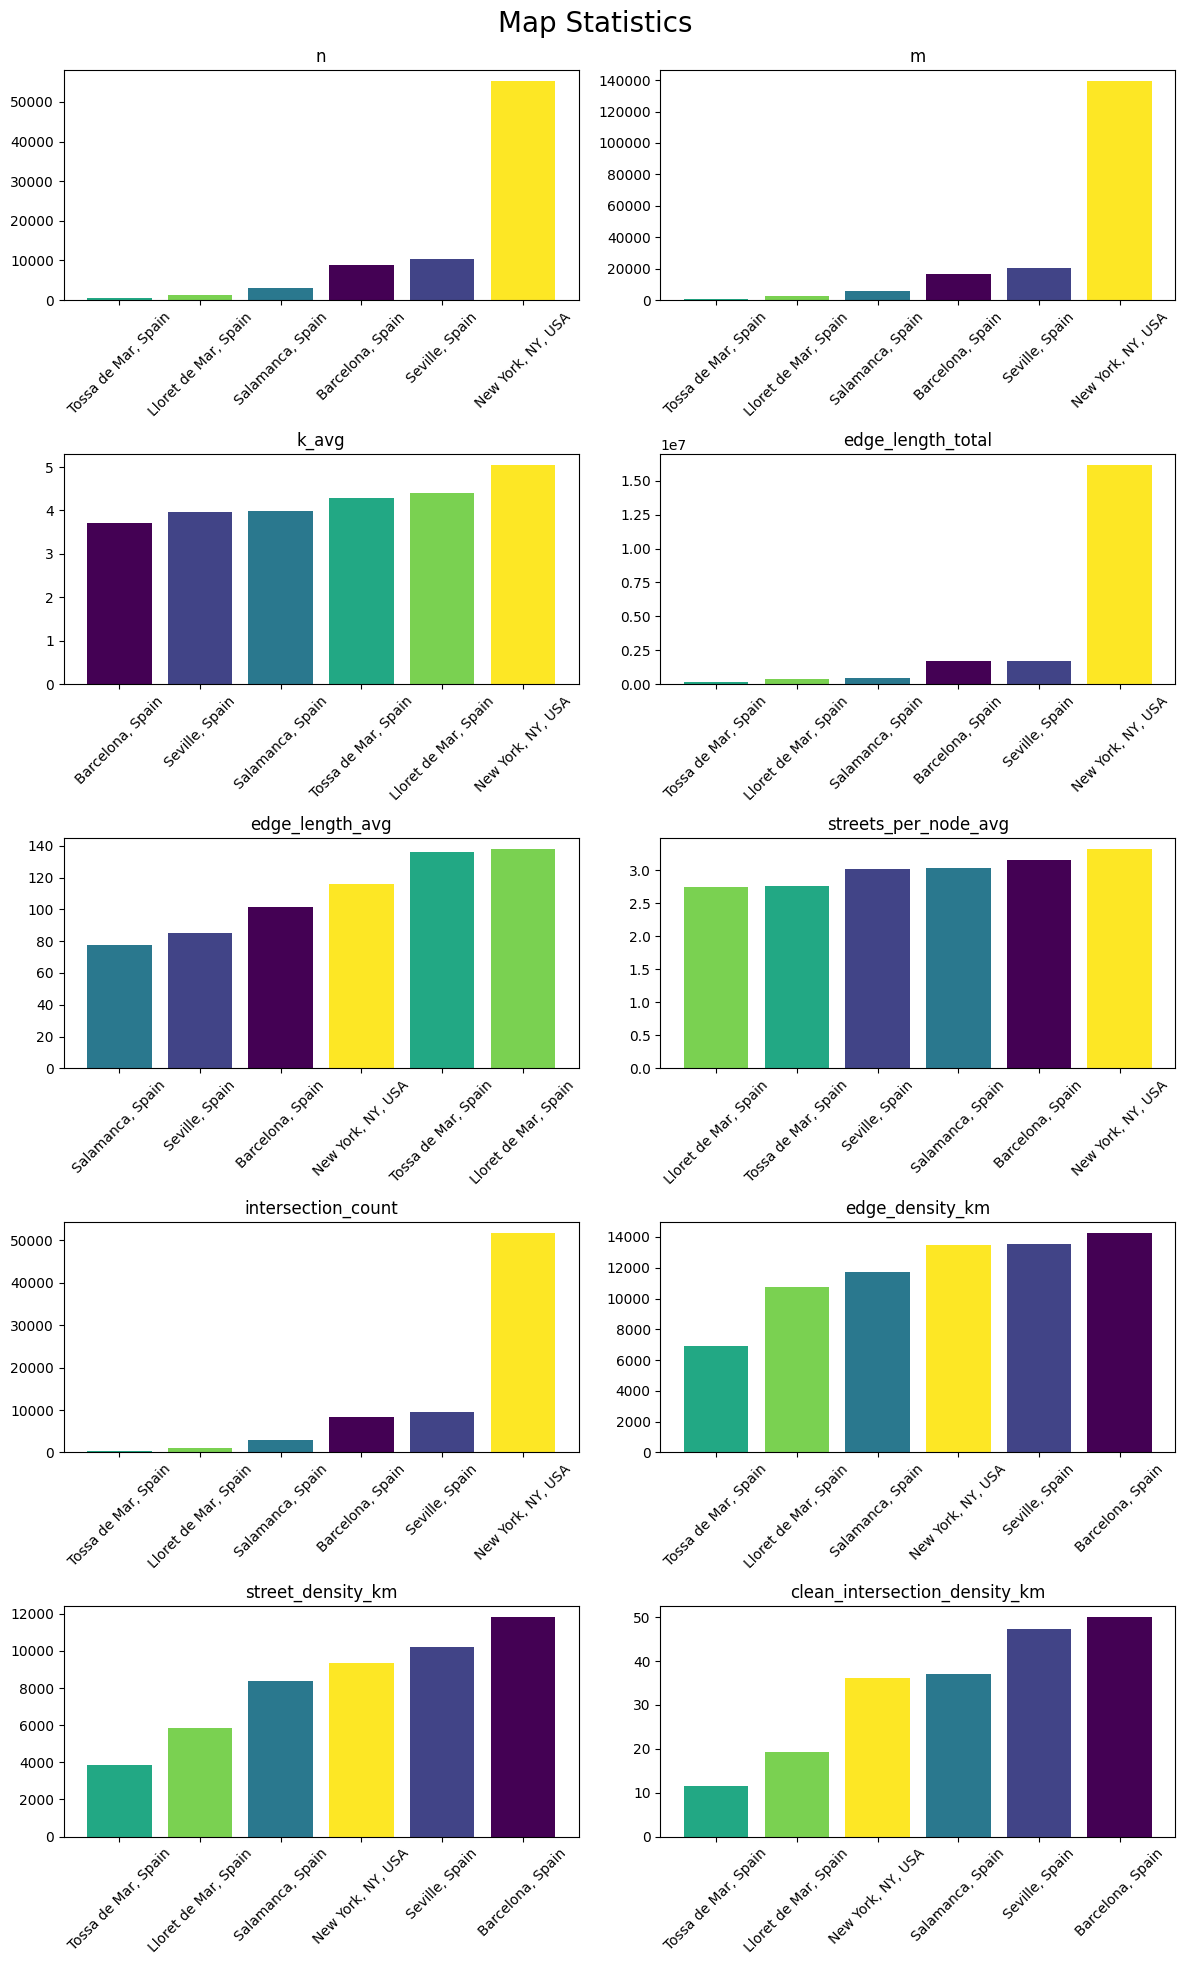

In [7]:
columns = ['n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg', 'streets_per_node_avg', 'intersection_count', 'edge_density_km', 'street_density_km', 'clean_intersection_density_km']

colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
color_dict = dict(zip(df.index, colors))

fig, axs = plt.subplots(len(columns) // 2, 2, figsize=(12, 20))
for ax, col in zip(axs.flatten(), columns):
    sorted_df = df.sort_values(by=col)
    ax.bar(sorted_df.index, sorted_df[col], color=[color_dict[i] for i in sorted_df.index])
    ax.set_title(col)
    ax.set_xticks(sorted_df.index)
    ax.set_xticklabels(sorted_df.index, rotation=45)
fig.suptitle('Map Statistics', fontsize=20)
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig('../reports/figures/map_complexity_statistics.png', dpi=300)
plt.show()


In [8]:
rankings_df = df.copy().drop(columns=set(df.columns) - set(columns))
for col in columns:
    rankings_df[col] = rankings_df[col].rank(ascending=False).astype('int64')
rankings_df

,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,intersection_count,edge_density_km,street_density_km,clean_intersection_density_km
"Barcelona, Spain",3,3,6,3,4,2,3,1,1,1
"Seville, Spain",2,2,5,2,5,4,2,2,2,2
"Salamanca, Spain",4,4,4,4,6,3,4,4,4,3
"Tossa de Mar, Spain",6,6,3,6,2,5,6,6,6,6
"Lloret de Mar, Spain",5,5,2,5,1,6,5,5,5,5
"New York, NY, USA",1,1,1,1,3,1,1,3,3,4


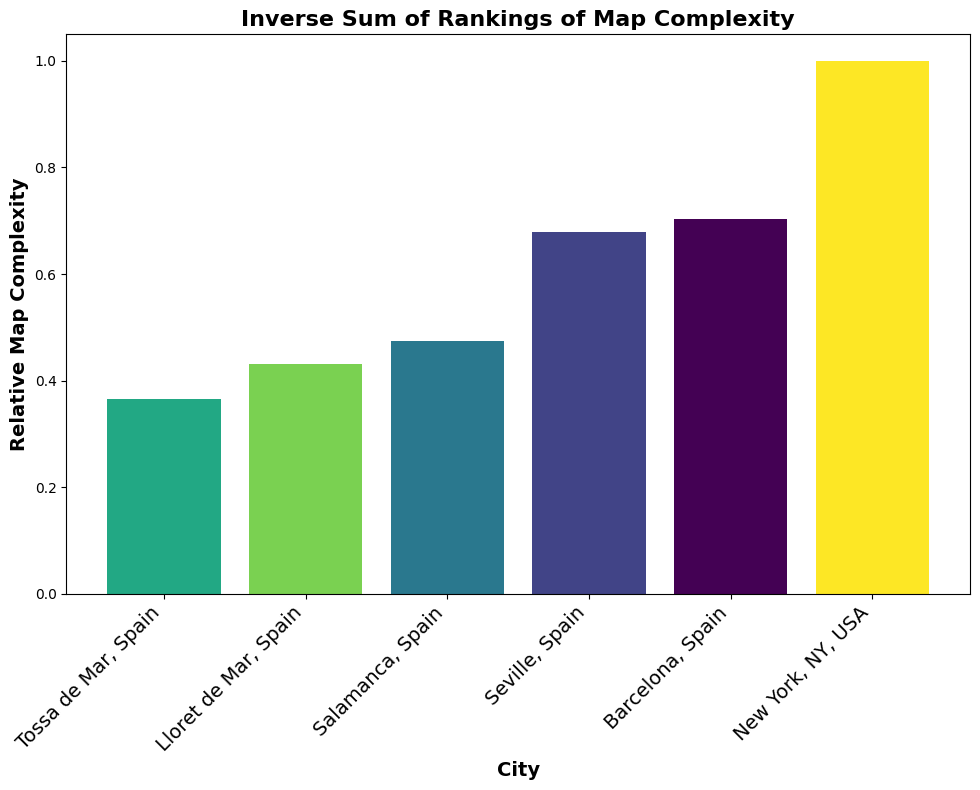

In [9]:
rank_sums = rankings_df.sum(axis=1)
rank_sums = rank_sums.sort_values(ascending=True)
inverse_rank_sums = ((1 / rank_sums) / (max(1 / rank_sums))).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(range(len(inverse_rank_sums)), inverse_rank_sums.values, color=[color_dict[i] for i in inverse_rank_sums.index])
ax.set_title('Inverse Sum of Rankings of Map Complexity', fontsize=16, fontweight='bold')
ax.set_xlabel('City', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(inverse_rank_sums)))
ax.set_xticklabels(inverse_rank_sums.index, rotation=45, ha='right', fontsize=14)
ax.set_ylabel('Relative Map Complexity', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/relative_map_complexity.png', dpi=300)
plt.show()
